In [1]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set(font='SimHei', font_scale=2.5)
#plt.rcParams['axes.grid'] = False

import numpy as np

import pandas as pd
#pd.options.display.max_rows = 20

import logging
logging.basicConfig()
logger = logging.getLogger()

from IPython.display import Image

import enum

Chapter 4 Dynamic Programming
================

limition:
+ assumption: a perfect model
+ great computational expense 

### 4.1 Plicy Evaluation (Prediction)

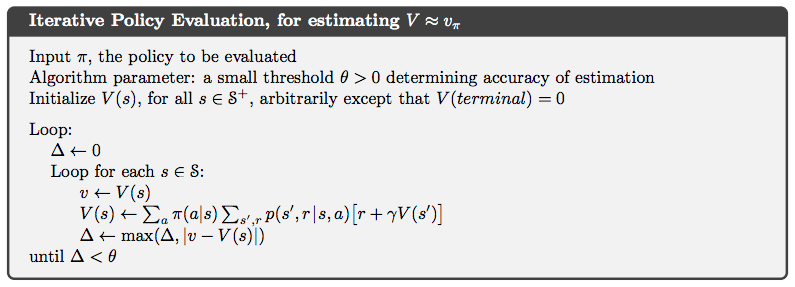

In [4]:
Image('./res/iterative_policy_evaluation.png')

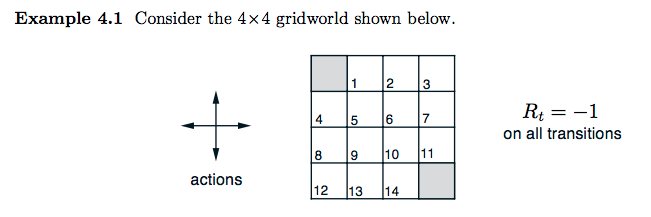

In [5]:
Image('./res/ex4_1.png')

In [7]:
class Action(enum.Enum):
    EAST = enum.auto()
    WEST = enum.auto()
    SOUTH = enum.auto()
    NORTH = enum.auto()
    
    @staticmethod
    def move(x, y, action):
        if action == Action.EAST:
            return x, y - 1
        elif action == Action.WEST:
            return x, y + 1
        elif action == Action.SOUTH:
            return x + 1, y
        elif action == Action.NORTH:
            return x - 1, y
            
            
class GridWorld(object):
    def move(self, s, action):
        if s == 0 or s == 15:
            return s, 0
        elif 0 < s < 15:
            x = s // 4
            y = s % 4
            x1, y1 = Action.move(x, y, action)
            if 0 <= x1 < 4 and 0 <= y1 < 4:
                s1 = x1 * 4 + y1
                return s1, -1
            else:
                return s, -1
        else:
            raise ValueError('s {} must be in [0, 15]'.format(s))
        
        
class RandomPolicy(object):
    
    def __init__(self, grid_world):
        self._grid_world = grid_world
        
        self._v = np.zeros((4, 4))
        self._v_flatten = self._v.ravel()
        
        self._delta = 0
    
    def iterate(self):
        v = self._v.copy()
        
        for s in range(0, 16):
            self.update_value(s)
        
        self._delta = max(self._delta, np.sum(np.abs(v - self._v)))
        
        return self._v.copy()
    
    def get_pi(self, s):
        return [(0.25, (s, a)) for a in [Action.EAST,
                                         Action.WEST,
                                         Action.SOUTH,
                                         Action.NORTH]]
    
    def update_value(self, s):
        # V(s) = \sum_a \pi(a | s) \sum 1 * (r + 1 * V(s1))
        vs = []
        for (prob, (s, a)) in self.get_pi(s):
            s1, r = self._grid_world.move(s, a)
            vs.append(prob * (r + self._v_flatten[s1]))
        logger.debug('vs: {}'.format(vs))
        self._v_flatten[s] = np.sum(vs)

In [9]:
# logger.setLevel(logging.DEBUG)
r = RandomPolicy(GridWorld())
for _ in range(100):
    r.iterate()
pd.DataFrame(np.round(r.iterate()))

,0,1,2,3
0,0.0,-14.0,-20.0,-22.0
1,-14.0,-18.0,-20.0,-20.0
2,-20.0,-20.0,-18.0,-14.0
3,-22.0,-20.0,-14.0,0.0
